## Import all necessary library 

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


from sklearn.model_selection import train_test_split

## Problem Statement
We intend to create an intelligent, accurate credit scoring system to assess creditworthiness for the credit applicant. Our goal is to build a model which can accurately predict and differentiate bad and good customers.

## Load Data

we have 3 data:
1. customer information
2. credit bureau
3. external scoring

In [2]:
master = pd.read_csv("./data/raw/Customer_Information.csv")
master.head()

,customer_id,AGE,INCOME,GENDER,EDUCATION,LOAN_PURPOSE,APPLICATION_RECEIVE_TIME,HAS_APPLIED_BEFORE,HAS_INCOME_VERIFICATION,LOAN_WAS_PAID_BACK
0,36493,40,10000000.0,Female,Diploma,Working Capital,09:07:00,No,Yes,1
1,36494,39,15000000.0,Female,Bachelor Degree,Other,15:15:00,No,Yes,1
2,36495,28,15000000.0,Male,Bachelor Degree,Renovation,07:13:00,No,Yes,1
3,36496,28,4000000.0,Male,Bachelor Degree,Renovation,12:05:00,Yes,Yes,1
4,36497,38,10000000.0,Male,Diploma,Renovation,14:35:00,Yes,Yes,0


In [3]:
bureau = pd.read_csv("./data/raw/Credit_Bureau_Data.csv")
bureau.head()

,customer_id,LOANS_WITHOUT_DELAYS,LOANS_WITH_DELAYS,KNOWN_ASSETS
0,36493,3,3,40000000.0
1,36494,3,0,20000000.0
2,36496,2,1,0.0
3,36497,1,0,40000000.0
4,36498,7,0,NaN


In [4]:
external = pd.read_csv("./data/raw/External_Score.csv")
external.head()

,customer_id,Score
0,36493,0.77
1,36494,0.93
2,36496,0.78
3,36497,0.81
4,36498,0.78


because we want to predict LOAN_WAS_PAID_BACK so we think that score from exernal_score can make biases to our model

### 1. Merge the Data

In [5]:
# merge master and bureau
data = pd.merge(master, bureau, on='customer_id', how='left')
data.head()

,customer_id,AGE,INCOME,GENDER,EDUCATION,LOAN_PURPOSE,APPLICATION_RECEIVE_TIME,HAS_APPLIED_BEFORE,HAS_INCOME_VERIFICATION,LOAN_WAS_PAID_BACK,LOANS_WITHOUT_DELAYS,LOANS_WITH_DELAYS,KNOWN_ASSETS
0,36493,40,10000000.0,Female,Diploma,Working Capital,09:07:00,No,Yes,1,3.0,3.0,40000000.0
1,36494,39,15000000.0,Female,Bachelor Degree,Other,15:15:00,No,Yes,1,3.0,0.0,20000000.0
2,36495,28,15000000.0,Male,Bachelor Degree,Renovation,07:13:00,No,Yes,1,NaN,NaN,NaN
3,36496,28,4000000.0,Male,Bachelor Degree,Renovation,12:05:00,Yes,Yes,1,2.0,1.0,0.0
4,36497,38,10000000.0,Male,Diploma,Renovation,14:35:00,Yes,Yes,0,1.0,0.0,40000000.0


check empty data

In [6]:
data.isna().sum()

customer_id                    0
AGE                            0
INCOME                         2
GENDER                         0
EDUCATION                      0
LOAN_PURPOSE                  49
APPLICATION_RECEIVE_TIME       0
HAS_APPLIED_BEFORE             0
HAS_INCOME_VERIFICATION        0
LOAN_WAS_PAID_BACK             0
LOANS_WITHOUT_DELAYS        1320
LOANS_WITH_DELAYS           1320
KNOWN_ASSETS                2751
dtype: int64

because INCOME only have 2 rows that is empty so we decide to delete it

In [7]:
data = data.dropna(subset=['INCOME','LOAN_PURPOSE'])
data.reset_index(drop=True)

,customer_id,AGE,INCOME,GENDER,EDUCATION,LOAN_PURPOSE,APPLICATION_RECEIVE_TIME,HAS_APPLIED_BEFORE,HAS_INCOME_VERIFICATION,LOAN_WAS_PAID_BACK,LOANS_WITHOUT_DELAYS,LOANS_WITH_DELAYS,KNOWN_ASSETS
0,36493,40,10000000.0,Female,Diploma,Working Capital,09:07:00,No,Yes,1,3.0,3.0,40000000.0
1,36494,39,15000000.0,Female,Bachelor Degree,Other,15:15:00,No,Yes,1,3.0,0.0,20000000.0
2,36495,28,15000000.0,Male,Bachelor Degree,Renovation,07:13:00,No,Yes,1,NaN,NaN,NaN
3,36496,28,4000000.0,Male,Bachelor Degree,Renovation,12:05:00,Yes,Yes,1,2.0,1.0,0.0
4,36497,38,10000000.0,Male,Diploma,Renovation,14:35:00,Yes,Yes,0,1.0,0.0,40000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6532,43180,38,11000000.0,Female,Bachelor Degree,Working Capital,10:54:00,No,Yes,1,NaN,NaN,NaN
6533,43181,37,30000000.0,Female,Bachelor Degree,Education,07:04:00,No,Yes,1,1.0,0.0,30000000.0
6534,43182,50,16000000.0,Female,Master's Degree/Post graduate,Renovation,10:47:00,No,Yes,1,1.0,0.0,NaN
6535,43184,36,5000000.0,Male,Bachelor Degree,Other,15:49:00,No,Yes,1,1.0,0.0,NaN


we want to check is that data duplicated to prevent data leakage

In [8]:
df = data.drop('customer_id', axis=1)
df.head()

,AGE,INCOME,GENDER,EDUCATION,LOAN_PURPOSE,APPLICATION_RECEIVE_TIME,HAS_APPLIED_BEFORE,HAS_INCOME_VERIFICATION,LOAN_WAS_PAID_BACK,LOANS_WITHOUT_DELAYS,LOANS_WITH_DELAYS,KNOWN_ASSETS
0,40,10000000.0,Female,Diploma,Working Capital,09:07:00,No,Yes,1,3.0,3.0,40000000.0
1,39,15000000.0,Female,Bachelor Degree,Other,15:15:00,No,Yes,1,3.0,0.0,20000000.0
2,28,15000000.0,Male,Bachelor Degree,Renovation,07:13:00,No,Yes,1,NaN,NaN,NaN
3,28,4000000.0,Male,Bachelor Degree,Renovation,12:05:00,Yes,Yes,1,2.0,1.0,0.0
4,38,10000000.0,Male,Diploma,Renovation,14:35:00,Yes,Yes,0,1.0,0.0,40000000.0


In [9]:
df.duplicated().sum()

0

there is no data duplicated

### 2. Split the Data

> Create function to split between input and target variable. In this case, we will use "SalePrice" as target variable

In [10]:
def split_input_output(dataset,
                       target_column):
    
    output_df = dataset[target_column]
    input_df = dataset.drop([target_column],
                            axis = 1)
    
    return output_df, input_df

> Function to split between each set, Training->Dev->Test

In [11]:
def split_train_test(x, y, TEST_SIZE):
    # Do not forget to stratify if classification
    x_train, x_test,\
        y_train, y_test = train_test_split(x,
                                           y,
                                           test_size=TEST_SIZE,
                                           random_state=123)

    return x_train, x_test, y_train, y_test

In [12]:
def split_data(data_input, data_ouput, TEST_SIZE=0.2):

    x_train, x_test, \
        y_train, y_test = split_train_test(
            data_input,
            data_ouput,
            TEST_SIZE)

    x_train, x_valid, \
        y_train, y_valid = split_train_test(
            x_train,
            y_train,
            TEST_SIZE)
    return x_train, y_train, \
            x_valid, y_valid, \
            x_test, y_test

In [13]:
DATA_PATH = df
TARGET_COLUMN = "LOAN_WAS_PAID_BACK"
TEST_SIZE = 0.2
output_df, input_df = split_input_output(DATA_PATH,TARGET_COLUMN)
x_train, y_train, x_valid, y_valid, x_test, y_test = split_data(input_df,
                                                                output_df,
                                                                TEST_SIZE)

### 3. EDA

In [14]:
df_train = pd.merge(x_train,y_train,left_index=True, right_index=True)

### Checking initial features and data type

In [15]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4183 entries, 1520 to 5419
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   AGE                       4183 non-null   int64  
 1   INCOME                    4183 non-null   float64
 2   GENDER                    4183 non-null   object 
 3   EDUCATION                 4183 non-null   object 
 4   LOAN_PURPOSE              4183 non-null   object 
 5   APPLICATION_RECEIVE_TIME  4183 non-null   object 
 6   HAS_APPLIED_BEFORE        4183 non-null   object 
 7   HAS_INCOME_VERIFICATION   4183 non-null   object 
 8   LOANS_WITHOUT_DELAYS      3359 non-null   float64
 9   LOANS_WITH_DELAYS         3359 non-null   float64
 10  KNOWN_ASSETS              2445 non-null   float64
 11  LOAN_WAS_PAID_BACK        4183 non-null   int64  
dtypes: float64(4), int64(2), object(6)
memory usage: 553.9+ KB


- target is LOAN_WAS_PAID_BACK that is integer
- Six Features are string (object)
- Five features are integer or floats

### Check numerical distribution

In [16]:
df_train.describe()

,AGE,INCOME,LOANS_WITHOUT_DELAYS,LOANS_WITH_DELAYS,KNOWN_ASSETS,LOAN_WAS_PAID_BACK
count,4183.000000,4.183000e+03,3359.000000,3359.000000,2.445000e+03,4183.000000
mean,34.409276,7.951231e+06,1.653468,0.412623,1.273620e+07,0.852498
std,7.703827,6.496993e+06,0.832742,0.892712,1.240998e+07,0.354648
min,20.000000,0.000000e+00,1.000000,0.000000,0.000000e+00,0.000000
25%,28.000000,4.000000e+06,1.000000,0.000000,0.000000e+00,1.000000
50%,34.000000,6.000000e+06,1.000000,0.000000,1.000000e+07,1.000000
75%,40.000000,9.000000e+06,2.000000,0.000000,2.000000e+07,1.000000
max,54.000000,1.000000e+08,8.000000,3.000000,5.000000e+07,1.000000


- LOAN_WAS_PAID_BACK is a categorical feature with 0 or 1 values
- this is unbalance data because LOAN_WAS_PAID mostly paid with 85,6%
- ....

### Check categoriccal distribution

In [17]:
df_train.describe(include=['O'])

,GENDER,EDUCATION,LOAN_PURPOSE,APPLICATION_RECEIVE_TIME,HAS_APPLIED_BEFORE,HAS_INCOME_VERIFICATION
count,4183,4183,4183,4183,4183,4183
unique,2,5,11,1161,2,2
top,Male,Bachelor Degree,Working Capital,11:35:00,No,Yes
freq,2246,2195,1315,14,2713,4086


- most creditor is Male with 53% percent of the data (2234/4214)
- most creditor's Education is Bachelor Degree with 52% percent of the data (2201/4214)
- most credior haven't applied credit before with 64% percent of the data (2701/4214)
- most creditor has income verification with 98% percent of the data(4116/4214)

In [18]:
print(df_train.columns.values)

['AGE' 'INCOME' 'GENDER' 'EDUCATION' 'LOAN_PURPOSE'
 'APPLICATION_RECEIVE_TIME' 'HAS_APPLIED_BEFORE' 'HAS_INCOME_VERIFICATION'
 'LOANS_WITHOUT_DELAYS' 'LOANS_WITH_DELAYS' 'KNOWN_ASSETS'
 'LOAN_WAS_PAID_BACK']


#### Showing the distribution of our target variable

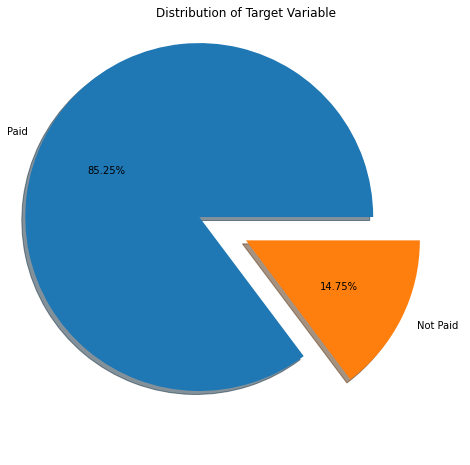

In [19]:
plt.figure(figsize = (8,8))
plt.pie(
    x = df_train['LOAN_WAS_PAID_BACK'].value_counts(),
    labels = ['Paid','Not Paid'],
    autopct = '%1.2f%%',
    shadow = True,
    explode = (0.3,0)
)
plt.title('Distribution of Target Variable')
plt.show()

we can see that is unbalance data

#### AGE

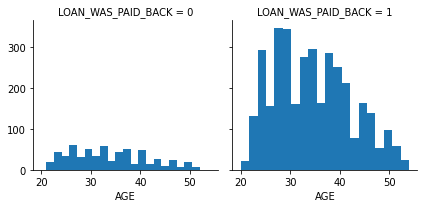

In [20]:
g = sns.FacetGrid(df_train, col='LOAN_WAS_PAID_BACK')
g.map(plt.hist, 'AGE', bins=20)

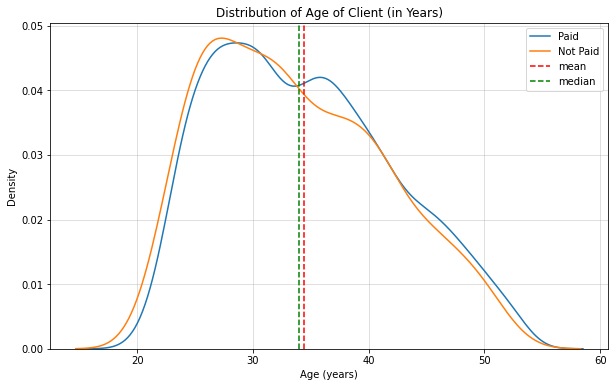

In [21]:
plt.figure(figsize=(10,6))
plt.grid(True, alpha=0.5)
sns.kdeplot(df_train.loc[df['LOAN_WAS_PAID_BACK'] == 1, 'AGE'] , label = 'Paid')
sns.kdeplot(df_train.loc[df['LOAN_WAS_PAID_BACK'] == 0, 'AGE'] ,  label = 'Not Paid')
plt.axvline(df_train.AGE.mean(), 0, 1, label = 'mean', color = 'r', ls = '--')
plt.axvline(df_train.AGE.median(), 0, 1, label = 'median', color = 'g', ls = '--')
plt.xlabel('Age (years)')
plt.ylabel('Density')
plt.legend()
plt.title('Distribution of Age of Client (in Years)');

#### INCOME

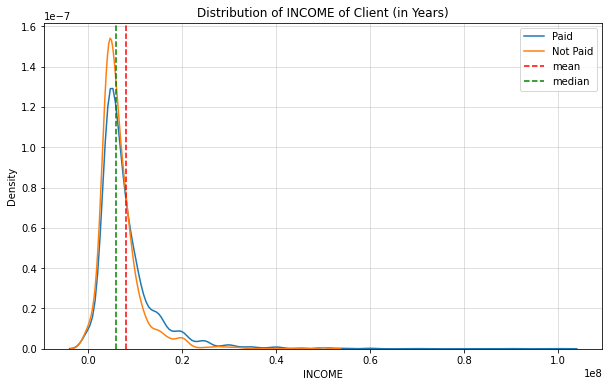

In [22]:
plt.figure(figsize=(10,6))
plt.grid(True, alpha=0.5)
sns.kdeplot(df_train.loc[df['LOAN_WAS_PAID_BACK'] == 1, 'INCOME'] , label = 'Paid')
sns.kdeplot(df_train.loc[df['LOAN_WAS_PAID_BACK'] == 0, 'INCOME'] ,  label = 'Not Paid')
plt.axvline(df_train.INCOME.mean(), 0, 1, label = 'mean', color = 'r', ls = '--')
plt.axvline(df_train.INCOME.median(), 0, 1, label = 'median', color = 'g', ls = '--')
plt.xlabel('INCOME')
plt.ylabel('Density')
plt.legend()
plt.title('Distribution of INCOME of Client (in Years)');

#### GENDER

In [23]:
df_train[["GENDER", "LOAN_WAS_PAID_BACK"]].groupby(['GENDER'], as_index=False).mean().sort_values(by="LOAN_WAS_PAID_BACK", ascending=False)

,GENDER,LOAN_WAS_PAID_BACK
1,Male,0.873998
0,Female,0.827568


most creditor is Male with 53% percent of the data (2234/4214) and  the male tend to pay loans than female

#### EDUCATION

In [24]:
df_train[["EDUCATION", "LOAN_WAS_PAID_BACK"]].groupby(['EDUCATION'], as_index=False).mean().sort_values(by="LOAN_WAS_PAID_BACK", ascending=False)

,EDUCATION,LOAN_WAS_PAID_BACK
3,Master's Degree/Post graduate,0.955357
0,Bachelor Degree,0.873804
1,Diploma,0.853591
2,High School,0.801786
4,Other,0.781250


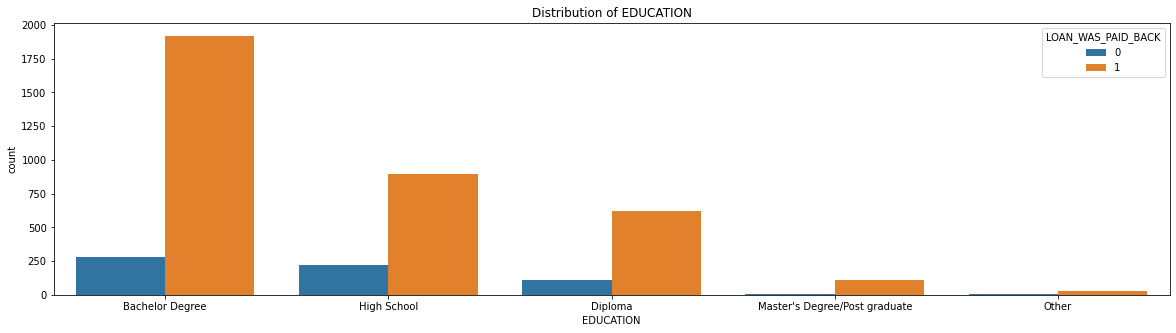

In [25]:
plt.figure(figsize=(20,5))
ax = sns.countplot(hue="LOAN_WAS_PAID_BACK",
                   x="EDUCATION", 
                   data=df_train, 
                  order = df_train["EDUCATION"].value_counts().index)
plt.title("Distribution of EDUCATION")
plt.show()

we can see that the higher the education, the greater the probability of repaying the loan

#### LOAN PURPOSE

In [26]:
df_train[["LOAN_PURPOSE", "LOAN_WAS_PAID_BACK"]].groupby(['LOAN_PURPOSE'], as_index=False).mean().sort_values(by="LOAN_WAS_PAID_BACK", ascending=False)

,LOAN_PURPOSE,LOAN_WAS_PAID_BACK
9,Venture capital,0.969231
2,Education,0.930693
4,Holiday,0.904412
7,Other,0.892857
1,Credit card,0.876842
0,Bills,0.876106
8,Renovation,0.866960
3,Electronic unsecured loan,0.862069
6,Investment,0.853659
5,Housing loan,0.840909


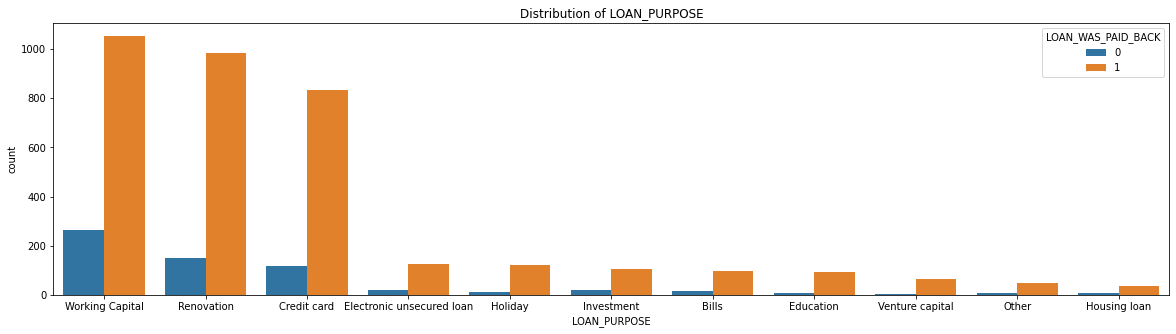

In [27]:
plt.figure(figsize=(20,5))
ax = sns.countplot(hue="LOAN_WAS_PAID_BACK",
                   x="LOAN_PURPOSE", 
                   data=df_train, 
                  order = df_train["LOAN_PURPOSE"].value_counts().index)
plt.title("Distribution of LOAN_PURPOSE")
plt.show()

#### HAS_APPLIED_BEFORE

In [36]:
df_train[["HAS_APPLIED_BEFORE", "LOAN_WAS_PAID_BACK"]].groupby(['HAS_APPLIED_BEFORE'], as_index=False).mean().sort_values(by="LOAN_WAS_PAID_BACK", ascending=False)

,HAS_APPLIED_BEFORE,LOAN_WAS_PAID_BACK
0,No,0.881681
1,Yes,0.798639


#### HAS_INCOME_VERIFICATION

In [28]:
df_train[["HAS_INCOME_VERIFICATION", "LOAN_WAS_PAID_BACK"]].groupby(['HAS_INCOME_VERIFICATION'], as_index=False).mean().sort_values(by="LOAN_WAS_PAID_BACK", ascending=False)

,HAS_INCOME_VERIFICATION,LOAN_WAS_PAID_BACK
1,Yes,0.855849
0,No,0.711340


if creditur has income verification, they more likely pay loans

#### LOANS_WITHOUT_DELAYS

In [29]:
df_train[["LOANS_WITHOUT_DELAYS", "LOAN_WAS_PAID_BACK"]].groupby(['LOANS_WITHOUT_DELAYS'], as_index=False).mean().sort_values(by="LOAN_WAS_PAID_BACK", ascending=False)

,LOANS_WITHOUT_DELAYS,LOAN_WAS_PAID_BACK
4,5.0,1.000000
6,7.0,1.000000
7,8.0,1.000000
3,4.0,0.890411
2,3.0,0.888889
1,2.0,0.862222
0,1.0,0.838052
5,6.0,0.750000


#### LOANS_WITH_DELAYS

In [30]:
df_train[["LOANS_WITH_DELAYS", "LOAN_WAS_PAID_BACK"]].groupby(['LOANS_WITH_DELAYS'], as_index=False).mean().sort_values(by="LOAN_WAS_PAID_BACK", ascending=False)

,LOANS_WITH_DELAYS,LOAN_WAS_PAID_BACK
1,1.0,0.858553
0,0.0,0.855522
2,2.0,0.841060
3,3.0,0.838462


The more loans that are delayed, the more likely they are not to pay loans

#### KNOWN_ASSETS

In [31]:
df_train[["KNOWN_ASSETS", "LOAN_WAS_PAID_BACK"]].groupby(['KNOWN_ASSETS'], as_index=False).mean().sort_values(by="LOAN_WAS_PAID_BACK", ascending=False)

,KNOWN_ASSETS,LOAN_WAS_PAID_BACK
4,40000000.0,0.946667
3,30000000.0,0.946429
5,50000000.0,0.927928
1,10000000.0,0.881711
2,20000000.0,0.881068
0,0.0,0.849057


### 4. Features Engineering and Selection